In [13]:
import pandas as pd
housing=pd.read_csv('hdataset.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1878899,7481,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1038471,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,3000000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4000000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,5000000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
housing['mainroad']=housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom']=housing['guestroom'].map({'yes':1,'no':0})
housing['basement']=housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating']=housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning']=housing['airconditioning'].map({'yes':1,'no':0})
housing['prefarea']=housing['prefarea'].map({'yes':1,'no':0})

In [15]:
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing=pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [16]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished
0,1878899,7481,4,2,3,1,0,0,0,1.0,2,1,0
1,1038471,8960,4,4,4,1,0,0,0,1.0,3,0,0
2,3000000,9960,3,2,2,1,0,1,0,0.0,2,1,1
3,4000000,7500,4,2,2,1,0,1,0,NaN,3,1,0
4,5000000,7420,4,1,2,1,1,1,0,1.0,2,0,0


In [17]:
housing=(housing-housing.mean())/housing.std()  
housing.head()  

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished
0,-0.695021,-0.682338,0.447214,-0.182574,0.447214,NaN,-0.447214,-1.095445,NaN,0.5,-0.730297,0.730297,-0.447214
1,-1.223835,0.606193,0.447214,1.643168,1.565248,NaN,-0.447214,-1.095445,NaN,0.5,1.095445,-1.095445,-0.447214
2,0.010398,1.477411,-1.788854,-0.182574,-0.670820,NaN,-0.447214,0.730297,NaN,-1.5,-0.730297,0.730297,1.788854
3,0.639619,-0.665784,0.447214,-0.182574,-0.670820,NaN,-0.447214,0.730297,NaN,NaN,1.095445,0.730297,-0.447214
4,1.268839,-0.735482,0.447214,-1.095445,-0.670820,NaN,1.788854,0.730297,NaN,0.5,-0.730297,-1.095445,-0.447214


In [18]:
x=housing['area']
y=housing['price']

In [19]:
import seaborn as sns
%matplotlib inline

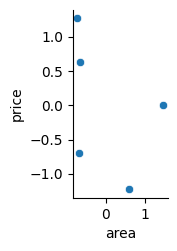

In [20]:
sns.pairplot(housing,x_vars='area',y_vars='price',aspect=0.7,kind='scatter')

In [21]:
import numpy as np
X=np.array(x)
Y=np.array(y)

In [22]:
def gradient(X,Y,m_current=0,c_current=0,iters=1000,learning_rate=0.01):
    N=float(len(y))
    gd_df=pd.DataFrame(columns=['m_current','c_current','cost'])
    for i in range(iters):
        y_current=(m_current*X)+c_current
        cost=sum([data**2 for data in (Y-y_current)])/N
        m_gradient=-(2/N)*sum(X*(Y-y_current))
        c_gradient=-(2/N)*sum(Y-y_current)
        m_current=m_current-(learning_rate*m_gradient)
        c_current=c_current-(learning_rate*c_gradient)
        gd_df.loc[i]=[m_current,c_current,cost]
    return(gd_df)

In [23]:
gradients=gradient(X,Y)
gradients

,m_current,c_current,cost
0,-0.006445,8.881784e-19,0.800000
1,-0.012788,1.776357e-18,0.795879
2,-0.019028,1.776357e-18,0.791889
3,-0.025169,1.776357e-18,0.788025
4,-0.031212,1.776357e-18,0.784284
...,...,...,...
995,-0.402834,-1.949552e-16,0.670180
996,-0.402834,-1.940670e-16,0.670180
997,-0.402834,-1.945111e-16,0.670180
998,-0.402834,-1.936229e-16,0.670180


<AxesSubplot:xlabel='index'>

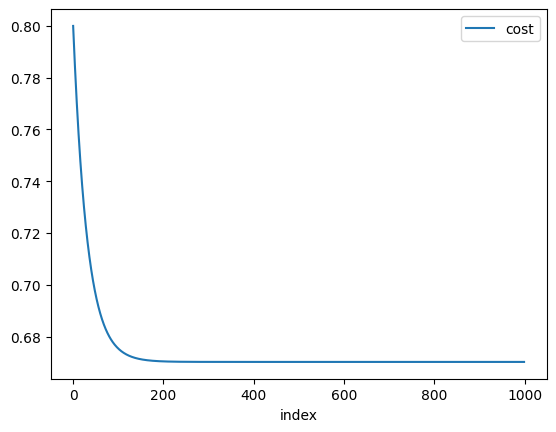

In [24]:
gradients.reset_index().plot.line(x='index',y=['cost'])